In [23]:
import math
import numpy as np
import matplotlib.pyplot as plt
from graphviz import Digraph

In [ ]:
class Value:
    
    def __init__(self, data, _children = (), _op = '', mark = ''):
        self.data = data
        self.grad = 0.0
        self.kids = _children
        self.actn = _op
        self.mark = mark
        self._back = lambda: None

    def __repr__(self):
        return f"Value({self.data})"
    
    def __add__(self, other):
        out =  Value(self.data + other.data, ( self, other ), '+')
        def _back():
            self.grad = 1.0 * out.data
            other.grad = 1.0 * out.data
        out._back = _back
        return out

    def __sub__(self, other):
        out = Value(self.data - other.data, ( self, other ), '-')
        return out

    def __mul__(self, other):
        out =  Value(self.data * other.data, ( self, other ), '*')
        def _back():
            self.grad = other.data * self.grad
            other.grad = self.data * self.grad
        out._back = _back
        return out

    def tanh(self):
        out = Value(math.tanh(self.data), ( self, ), 'tanh')
        def _back():
            self.grad = (1 - math.tanh(self.data)**2) * self.grad
        out._back = _back
        return out

a = Value(-2.0, mark = 'a')
b = Value(3.0, mark = 'b')
c = Value(4.0, mark = 'c')
e = a*b; e.mark = 'e'
d = e + c; d.mark = 'd'
f = Value(-2.0, mark = 'f')
L = d * f; L.mark = 'L'
L

Value(4.0)

In [41]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v.kids:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        dot.node(name=uid, label = "{ %s | data %.4f | grad %.4f }" % (n.mark, n.data, n.grad), shape='record')
        if n.actn:
            dot.node(name=uid + n.actn, label=n.actn)
            dot.edge(uid + n.actn, uid)

    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2.actn)

    return dot

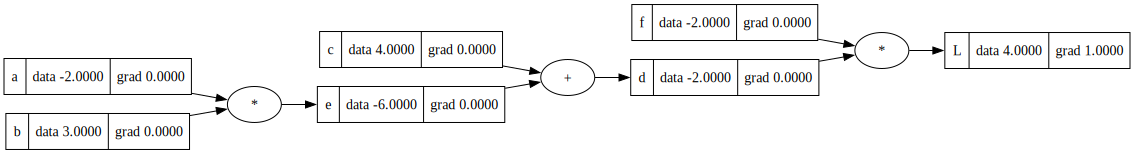

In [45]:
draw_dot(L)

In [44]:
L.grad = 1.0
L._back

<function __main__.Value.__mul__.<locals>._back(self)>